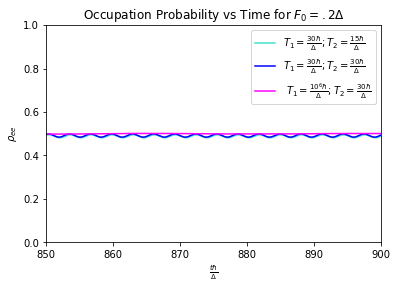

In [5]:

from qutip import *
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig




# Constants
delta = .2*2*np.pi
eps0 = 1 * 2 * np.pi
A = 2.5 * 2 * np.pi
omega = delta
T = 2 * np.pi / omega

T1=30*delta
#T2=60*delta
gamma1=1/(4*30*delta)
#gamma1prime=1/(4*10*delta)
gamma1_1=1/(4*10**6*delta)
#gamma2=(1/T2-2*gamma1)/2
L1=sigmax()-1j*sigmay()
L2=-1*sigmaz()
#C1=np.sqrt(gamma1)*L1
#C2=np.sqrt(gamma2)*L2
options=qutip.Options(store_states=True)
psi0 = basis(2,1)
def C1(T1):
    return (np.sqrt(1/(4*T1*delta)))*L1
def C2(T2):
    return (np.sqrt(1/(T2*delta)-2*gamma1)/2)*L2
def C2_1(T3):
    return (np.sqrt(1/(T3*delta)-2*gamma1_1)/2)*L2
def C1_1(T4):
    return np.sqrt(1/(4*T4*delta))*L1




times= np.linspace(0.0, 900, 5000)
 

F0list=[.01,0.1,0.2]

rhoee_0=[]
rhoee_1=[]
rhoee_2=[]

Fin_result=[]

for F0 in F0list:
    H0=(1/2)*sigmaz()
    H1=sigmax()
    def H1_coeff(times,args):
        return F0*np.sin(times)
    H = [H0,[H1,H1_coeff]]
    
    result_0 = mesolve(H, psi0.proj(), times,[C1(30),C2(15)],[],options=options)
    result_1 = mesolve(H, psi0.proj(), times,[C1(30),C2(30)],[],options=options)
    result_2 = mesolve(H, psi0.proj(), times,[C1_1(10**6),C2_1(30)],[],options=options)   
    

    rhoee_0.append(np.array([state.full()[0,0].real for state in result_0.states]))
    rhoee_1.append(np.array([state.full()[0,0].real for state in result_1.states]))
    rhoee_2.append(np.array([state.full()[0,0].real for state in result_2.states]))
fig, ax = plt.subplots() 
ax.set_title(r'Occupation Probability vs Time for $F_{0}=.2 \Delta$')
ax.set_xlim(850,900) #set from 0,900 to reproduce figure 5
ax.set_ylim(0,1)
ax.plot(times,rhoee_0[2],'turquoise',label=r'$T_{1} =  \frac{30 \hbar}{\Delta}; T_{2} = \frac{15 \hbar}{\Delta} $') 
ax.plot(times,rhoee_1[2], 'blue',label=r'$T_{1} =  \frac{30 \hbar}{\Delta}; T_{2} = \frac{30 \hbar}{\Delta} $')
ax.plot(times,rhoee_2[2], 'magenta',label=r' $T_{1}=\frac{ 10^{6} \hbar}{\Delta}; T_{2} =\frac{30 \hbar}{\Delta}$')
ax.set_xlabel(r'$\frac{t \hbar}{\Delta}$') 
ax.set_ylabel(r'$\rho_{ee}$') 
ax.legend()  
plt.show() 

